In [6]:
# random coin flips with fair coin, then computes p-value for the hypothesis that the coin is fair or not. 
# start with n = 20, and then increase the number of coin flips to n = 50, computing the p-value for each time.
# then plot the p-value as a function of n, and see how it changes as n increases.
# goal is to show that somrtimes retesting will cause the p-value to indicate a significant result even if it isn't true.

import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import binomtest

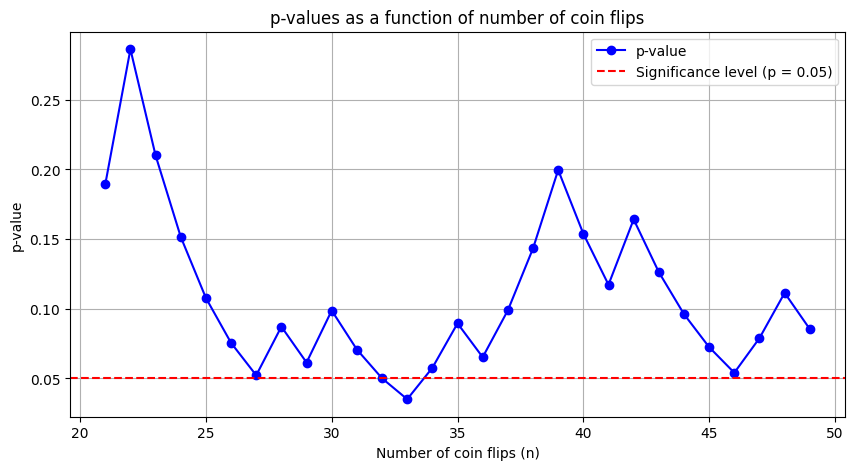

In [10]:
np.random.seed(41)  

initial_n = 20
max_n = 50
flips = np.random.binomial(n=1, p=0.5, size=initial_n)  # Simulate coin flips (1 for heads, 0 for tails)

# to store the number of flips and corresponding p-values
n_values = list(range(initial_n+1, max_n))
p_values = []

for n_flips in n_values:
    new_flip = np.random.binomial(n=1, p=0.5)  # Simulate a new coin flip
    flips = np.append(flips, new_flip)
    heads = np.sum(flips) # Count the number of heads

    # Compute p-value for the hypothesis that the coin is fair (two-tailed test)
    p_value = binomtest(heads, n=n_flips, p=0.5, alternative='two-sided')
    p_values.append(p_value.pvalue)

# Plotting the p-values as a function of n (vs the number of flips)
plt.figure(figsize=(10, 5))
plt.plot(n_values, p_values, marker='o',linestyle='-', label='p-value', color='blue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (p = 0.05)')
plt.xlabel('Number of coin flips (n)')
plt.ylabel('p-value')
plt.title('p-values as a function of number of coin flips')
plt.legend()
plt.grid(True)
plt.show()